In [89]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

In [91]:
def isInTheList(elemento,arreglo):
    for i in arreglo:
        if np.array_equal(i,elemento):
            return True            
    return False  

def prim(grafo):
    visitados = []
    arbol = []
    visitados.append(list(grafo.keys())[0])
    while len(visitados) < len(grafo):
        menor = 1000000
        for i in visitados:
            for j in grafo[i]:
                if j not in visitados and grafo[i][j] < menor:
                    menor = grafo[i][j]
                    nodo1 = i
                    nodo2 = j
        visitados.append(nodo2)
        arbol.append((nodo1, nodo2))
    return arbol

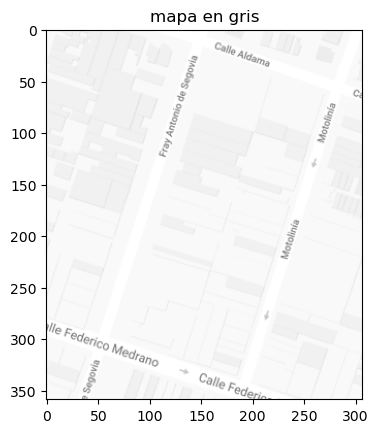

In [92]:
mapa=cv2.imread('map3chiquito.PNG')
gray = cv2.cvtColor(mapa,cv2.COLOR_BGR2GRAY)
plt_gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(plt_gray)
plt.title('mapa en gris')
plt.show()

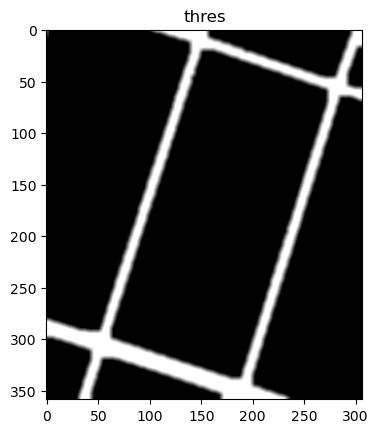

In [93]:

ret,th1 = cv2.threshold(gray,254,255,cv2.THRESH_BINARY)
kernel = np.ones((11,11), np.uint8) 
th1 = cv2.dilate(th1,kernel,1)
kernel = np.ones((11,11), np.uint8) 
th1 = cv2.erode(th1,kernel,1)
th1 = cv2.GaussianBlur(th1,(5,5),cv2.BORDER_DEFAULT) 
plt_th1 = cv2.cvtColor(th1, cv2.COLOR_BGR2RGB)
plt.imshow(plt_th1)
plt.title('thres')
plt.show()

Forma 2: [104   0] [160   6]
Forma 2: [104   0] [137  14]
Forma 2: [104   0] [152  22]
Forma 2: [104   0] [294  53]
Forma 2: [104   0] [270  60]
Forma 2: [104   0] [286  67]
Forma 2: [160   6] [137  14]
Forma 2: [160   6] [152  22]
Forma 2: [160   6] [294  53]
Forma 2: [160   6] [270  60]
Forma 2: [160   6] [286  67]
Forma 2: [160   6] [ 51 290]
Forma 2: [160   6] [ 41 313]
Forma 2: [137  14] [152  22]
Forma 2: [137  14] [294  53]
Forma 2: [137  14] [270  60]
Forma 2: [137  14] [286  67]
Forma 2: [303  20] [279  44]
Forma 2: [303  20] [270  60]
Forma 2: [303  20] [286  67]
Forma 2: [303  20] [187 336]
Forma 2: [152  22] [294  53]
Forma 2: [152  22] [ 51 290]
Forma 2: [152  22] [ 65 298]
Forma 2: [152  22] [ 41 313]
Forma 2: [152  22] [ 56 321]
Forma 2: [279  44] [294  53]
Forma 2: [279  44] [270  60]
Forma 2: [279  44] [286  67]
Forma 2: [279  44] [187 336]
Forma 2: [279  44] [202 344]
Forma 2: [294  53] [270  60]
Forma 2: [294  53] [286  67]
Forma 2: [294  53] [187 336]
Forma 2: [270 

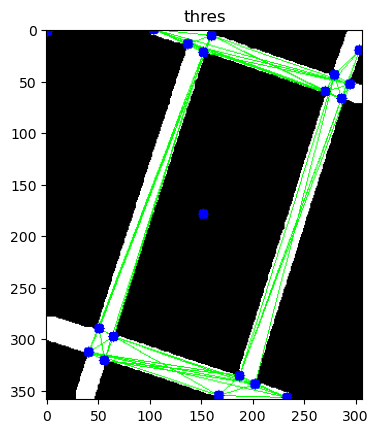

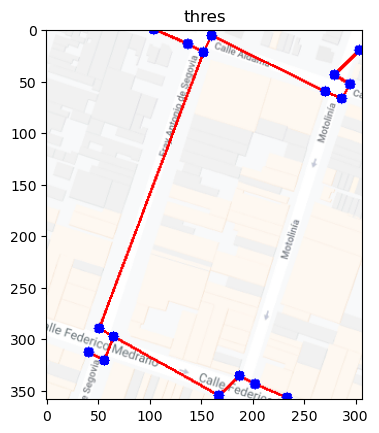

In [95]:
dst = cv2.cornerHarris(th1,2,3,0.05)
ret, dst = cv2.threshold(dst,0.04*dst.max(),255,0)
dst = np.uint8(dst)
ret,th2 = cv2.threshold(th1,235,255,cv2.THRESH_BINARY)
th2 = cv2.dilate(th2,kernel,1)
th2 = cv2.cvtColor(th2,cv2.COLOR_GRAY2BGR)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst,30, cv2.CV_32S)
vertices=np.int0(centroids)
    
aux1=vertices
aux2=vertices
verticesConectados=[]
aristas=[]

for h in range(len(aux1)):
    i=aux1[h]
    for k in range(h,len(aux2)):
        j=aux2[k]
        if not (i==j).all():
            x = np.linspace(i[0], j[0], 100).astype(int)
            y = np.linspace(i[1], j[1], 100).astype(int)
            midPoints = th2[y,x,:]
            if np.mean(midPoints)>250:
                distancia = int(sqrt((i[0] - j[0])**2 + (i[1] - j[1])**2))
                aristas.append((i,j,distancia))
                if not isInTheList(i,verticesConectados):
                    verticesConectados.append(i)
                if not isInTheList(j,verticesConectados):
                    verticesConectados.append(j)
                    
for arista in aristas:
    cv2.line(th2, tuple(arista[0]), tuple(arista[1]), (0,255,0), 1)
    
for point in vertices:
    cv2.circle(th2,(point[0], point[1]), 5, (255,0,0), -1)    
    cv2.waitKey(1)
        
plt_th2 = cv2.cvtColor(th2, cv2.COLOR_BGR2RGB)
plt.imshow(plt_th2)
plt.title('thres')
plt.show()
#cv2.imwrite('Puntos.png',th2)
#algoritmo de prim
grafo = {}
for i in verticesConectados:
    grafo[tuple(i)] = {}
for arista in aristas:
    grafo[tuple(arista[0])][tuple(arista[1])] = arista[2]
    grafo[tuple(arista[1])][tuple(arista[0])] = arista[2]

arbol = prim(grafo)
for arista in arbol:
    cv2.line(mapa, tuple(arista[0]), tuple(arista[1]), (0,0,255), 2)

for point in verticesConectados:
    cv2.circle(mapa,(point[0], point[1]), 5, (255,0,0), -1)    
    cv2.waitKey(1)

plt_mapa = cv2.cvtColor(mapa, cv2.COLOR_BGR2RGB)
plt.imshow(plt_mapa)
plt.title('thres')
plt.show()